# Mind Map Generator for PDF Files

## Project Overview

The **Mind Map Generator** is a tool designed to automatically create mind maps from PDF documents. By leveraging text extraction techniques and large language models (LLMs), the tool converts complex, text-heavy documents into visual representations, making it easier to understand and explore the content.

## Key Features

- **PDF Text Extraction:** Utilizes `pdfminer.six` for extracting text from PDF files while maintaining the document's structure.
- **LLM-Powered Analysis:** Uses `langchain` and `sentence-transformers` to analyze the extracted text, identifying key concepts, themes, and relationships within the document.
- **Automatic Mind Map Generation:** Transforms the analyzed data into an intuitive mind map format using `matplotlib`, highlighting connections between concepts and providing a visual overview of the document's content.
- **Customizable Output:** Offers options to customize the appearance and structure of the mind maps, allowing users to tailor the output to their preferences.
- **User-Friendly Interface:** Provides a simple and intuitive interface for uploading PDF files, configuring settings, and viewing the generated mind maps.

## Technologies Used

- **PDF Parsing:** `pdfminer.six` for extracting text from PDF files.
- **Natural Language Processing (NLP):** `langchain` and `sentence-transformers` for text analysis and concept

## Use Cases

- **Academic Research:** Quickly summarize and visualize the main ideas and connections within scholarly articles and research papers.
- **Business Reports:** Extract key insights from lengthy reports and create visual summaries for easier comprehension and presentation.
- **Learning and Revision:** Generate mind maps from textbooks or study materials to aid in revision and knowledge retention.

## Future Enhancements

- **Integration with Other Document Formats:** Expanding support for other document formats like Word, HTML, and plain text files.
- **Interactive Mind Maps:** Allowing users to interact with the generated mind maps, enabling them to expand, collapse, and modify nodes.
- **Enhanced NLP Models:** Incorporating more advanced models for better text understanding and concept extraction.

## Conclusion

The Mind Map Generator for PDF Files aims to bridge the gap between traditional text documents and visual learning tools, making it easier for users to digest and retain complex information. By combining the power of text extraction and LLMs, this tool offers a unique and efficient way to transform documents into actionable insights.


In [ ]:
from pdfminer.high_level import extract_text
from langchain.text_splitter import RecursiveCharacterTextSplitter
from collections import namedtuple
from langchain_community.embeddings import HuggingFaceEmbeddings
from dotenv import load_dotenv, find_dotenv
import os

In [3]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [4]:
_ = load_dotenv(find_dotenv())
os.environ['CUDA_VISIBLE_DEVICES']

'0'

The above code looks for the availability of a CUDA based GPU and loads the .env file containing the API keys for further code

In [5]:
pdf_path = "/content/os.pdf"
source = "temp.pdf"

In [6]:
text = extract_text(pdf_path)
pages_text = text.split('\x0c')

In [7]:
print(f"Loaded {len(pages_text)} documents")

Loaded 206 documents


In [8]:
Document = namedtuple('Document', ['page_content', 'metadata'])

Convert the document into a list of tuples, whilst separating the page_content and relevant metadata

In [9]:
documents = []
for i, page_text in enumerate(pages_text):
    page_text = page_text.strip()
    if page_text:  # Check if page_text is not an empty string
        document = Document(page_content=page_text, metadata={'source': source, 'page': i+1})
        documents.append(document)

for document in documents:
    print(document)

Document(page_content='OPERATING SYSTEMS \n\nCompiled by\nM S Anand\n\nDepartment of Computer Science', metadata={'source': 'temp.pdf', 'page': 1})
Document(page_content='OPERATING SYSTEMS\nIntroduction\n\nText Book(s):\n1. “Operating System Concepts”, Abraham Silberschatz, Peter Baer Galvin, \nGreg Gagne 9th Edition, John Wiley & Sons, India Edition ,2016.\n2. “Advanced Programming in the Unix Environment”, Richard Stevens and \nStephen A Rago, Pearson, 3rd edition, 2017.\n\nReference Book(s):\n1. “Operating Systems, Internals and Design Principles”, William Stallings, \n9th Edition, Pearson, 2018.\n2. “Operating Systems”: Three Easy Pieces, RemziArpaci-Dusseau and \nAndrea Arpaci Dusseau, http://pages.cs.wisc.edu/~remzi/OSTEP/.\n3. “Operating Systems”, Harvey Deitel, Paul Deitel, David Choffnes, 3rd \nEdition, Prentice Hall, 2004.\n4. “Modern Operating Systems”, Andrew S Tanenbaum, 3rd edition, \nPearson, 2007.', metadata={'source': 'temp.pdf', 'page': 2})
Document(page_content='OPER

This script iterates through a collection of text pages and creates structured documents for further processing.

*1. Cleaning and Filtering Text:*

* The code loops through each page text using a for loop.
* Inside the loop, the strip() method removes any leading or trailing whitespace characters from the text.
* An if statement checks if the cleaned text has content. This ensures only pages with actual content are processed further.

*2. Creating Document Objects:*

* If the cleaned text has content, a new document object is created.
    * The document likely stores the cleaned text content and metadata such as source and page number.

* The newly created document is then appended to a list of documents.

*3. Printing Documents (Optional):*

* The script might iterate through the list of documents and print them for inspection. This depends on the implementation of the Document class.

In [10]:
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000, chunk_overlap=30, separators=["\n\n"]
)

docs = text_splitter.split_documents(documents)
print(f"Splitted into {len(docs)} chunks")
print("...")

Splitted into 210 chunks
...


Converting the extracted text content into a series of chunks whilst preserving some context between chunks by maintaining a considerable overlap of characters between chunks



In [11]:
embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Initiating an instance of a sentence transformer embedding to vectorize the text extracted from the document

In [12]:
embeddings = embedding_model.embed_documents([doc.page_content for doc in docs])

In [13]:
len(embeddings[0])

384

In [14]:
len(embeddings)

210

In [15]:
input_vector = np.random.rand(768).tolist()

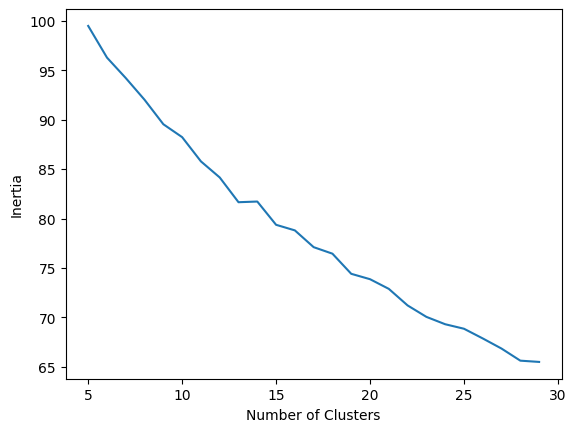

In [16]:
inertia=[]
for n in range(5, 30):
    kmeans = KMeans(n_clusters=n, random_state=42,n_init=10)
    kmeans.fit(embeddings)
    inertia.append(kmeans.inertia_)

plt.plot(range(5, 30), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

This script explores how the number of clusters (n_clusters) affects the inertia in K-Means clustering.

*1. Looping Through Cluster Numbers:*

* The code iterates through a range of cluster numbers (n_clusters) using a for loop.

**2. K-Means Clustering for Each n_clusters:**

* Inside the loop, a KMeans object is created with specified parameters:
    * Number of clusters (n_clusters) to be used for clustering.
    * Random seed (random_state) for consistent cluster initialization.
    * Number of initial centroid seedings (n_init) to explore different cluster configurations.
* The KMeans object is then fitted to the data (embeddings).

*3. Capturing Inertia:*

* After fitting the model, the inertia (kmeans.inertia_) is retrieved and stored for each n_clusters.
    * Inertia measures how well data points within a cluster are grouped together.

*4. Visualization:*

* A line plot is created to visualize the relationship between the number of clusters and inertia.
    * The x-axis represents the number of clusters used.
    * The y-axis represents the corresponding inertia values.
* Labels are added to the axes for clarity.

*5. Interpretation:*

* By analyzing the plot, we can identify the number of clusters that might lead to an optimal fit based on the inertia metric. Generally, lower inertia indicates better clustering.

In [17]:
def find_optimal_clusters(inertia):
    deltas = np.diff(inertia, 2)
    elbow_index = np.argmax(deltas) + 5
    return elbow_index

In [18]:
optimal_num_clusters = find_optimal_clusters(inertia)
print("Optimal number of clusters:", optimal_num_clusters)

Optimal number of clusters: 12


The `find_optimal_clusters` function is used to determine the optimal number of clusters for a given dataset using the elbow method. The function takes a single argument `inertia`, which is expected to be a list or array of inertia values corresponding to different numbers of clusters.

Here's a breakdown of the function:

1. `deltas = np.diff(inertia, 2)`: This line calculates the second-order differences of the `inertia` values. The `np.diff` function computes the difference between consecutive elements in the input array. By passing `2` as the second argument, it calculates the difference between differences, which is essentially the second-order derivative.

2. `elbow_index = np.argmax(deltas) + 5`: This line finds the index of the maximum value in the `deltas` array and adds 5 to it. The `np.argmax` function returns the index of the maximum value in the input array. The addition of 5 is a heuristic approach to account for potential noise in the data and ensure a more robust selection of the optimal number of clusters.

3. `return elbow_index`: The function returns the `elbow_index`, which corresponds to the optimal number of clusters according to the elbow method.

The elbow method is a heuristic technique used to determine the optimal number of clusters in a dataset. It involves plotting the inertia values (or a similar metric) against the number of clusters. The optimal number of clusters is typically identified as the point where the curve starts to flatten out, forming an "elbow" shape. This point represents a trade-off between minimizing the inertia (or other metric) and keeping the number of clusters reasonably small.

By calculating the second-order differences of the inertia values and finding the maximum value, the `find_optimal_clusters` function attempts to identify the point where the curve starts to flatten out, indicating the optimal number of clusters.

Note that the addition of 5 to the `elbow_index` is an approach used by us to maintain a minimum number of clusters (5) within the data

In [19]:
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42, n_init=10)
kmeans.fit(embeddings)
cluster_labels = kmeans.labels_

In [20]:
cluster_centroids = [np.mean(np.array([embeddings[i] for i in np.where(cluster_labels == j)[0]]), axis=0) for j in range(optimal_num_clusters)]
representative_chunks = []
for i, centroid in enumerate(cluster_centroids):
    distances = cdist([centroid], embeddings)[0]
    chunks=[]
    for j in range(5):
      chunk_idx = np.argsort(distances)[j]
      chunks.append(docs[chunk_idx])
    representative_chunks.append(chunks)

The code performs the following tasks:

1. Calculates the centroids for each cluster using the mean of embeddings belonging to that cluster:
  `cluster_centroids = [np.mean(np.array([embeddings[i] for i in np.where(cluster_labels == j)[0]]), axis=0) for j in range(optimal_num_clusters)]`

2. Initializes an empty list `representative_chunks` to store representative chunks for each cluster.

3. For each centroid:
  - Computes the distances between the centroid and all embeddings: `distances = cdist([centroid], embeddings)[0]`
  - Initializes an empty list `chunks` to store the top 5 closest chunks to the centroid.
  - Finds the indices of the 5 closest chunks to the centroid using `np.argsort(distances)`.
  - Appends the corresponding documents from `docs` to the `chunks` list.
  - Appends the `chunks` list to the `representative_chunks` list.

The resulting `representative_chunks` list contains sublists, where each sublist represents the top 5 closest chunks (documents) to the corresponding cluster centroid. This can be used for further analysis or summarization of the clusters.

In [21]:
overall_context=''
for i, chunk in enumerate(representative_chunks):
    overall_context+=f"Cluster {i+1}"+'\n'
    for j in range(5):
      overall_context+=(chunk[j].page_content)+'\n'
    overall_context+='\n'
overall_context

'Cluster 1\nThus, we want the time quantum to be large with respect to the context \nswitch time. If the context-switch time is approximately 10 percent of the \ntime quantum, then about 10 percent of the CPU time will be spent in \ncontext switching. In practice, most modern systems have time quanta \nranging from 10 to 100 milliseconds. The time required for a context switch \nis typically less than 10 microseconds; thus, the context-switch time is a \nsmall fraction of the time quantum.\nOPERATING SYSTEMS\nScheduling algorithms – Round Robin scheduling\n\nHow does context switching affect the performance of RR scheduling?\nAssume, for example, that we have only one process of 10 time units. If the \nquantum is 12 time units, the process finishes in less than 1 time quantum, \nwith no overhead. If the quantum is 6 time units, however, the process \nrequires 2 quanta, resulting in a context switch. If the time quantum is 1 \ntime unit, then nine context switches will occur, slowing th

The code constructs a string `overall_context` by iterating over `representative_chunks`. It initializes `overall_context` as an empty string, then for each chunk, appends the cluster number and a newline, appends the first 5 `page_content` strings from the chunk separated by newlines, and appends a blank line. Finally, it outputs the `overall_context` string containing concatenated content from all chunks, grouped by cluster. The resulting string can be used as a summary or overview of representative content from each cluster.

In [22]:
from langchain_community.llms import HuggingFaceEndpoint

In [23]:
repo_id = "mistralai/Mixtral-8x7B-Instruct-v0.1"
mixtral_llm = HuggingFaceEndpoint(
        endpoint_url=repo_id,
        task="text-generation",
        max_new_tokens=512,
        temperature=0.1,
        top_k=30,
        repetition_penalty=1.02,
)

Token will not been saved to git credential helper. Pass `add_to_git_credential=True` if you want to set the git credential as well.
Token is valid (permission: read).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [24]:
examples = [
    {
        "question": """
context:
Cluster 1:
Project management involves the process of planning, organizing, and managing resources to achieve specific goals and objectives within a given timeframe and budget. It encompasses initiating, planning, executing, monitoring, and closing projects. Effective project management requires skills in risk management, stakeholder management, communication, and leadership.
Cluster 2:
Key project management processes include scope definition, resource allocation, risk assessment, progress tracking, issue management, and change control. Project managers use various tools and techniques, such as Gantt charts, critical path analysis, and earned value management, to plan, schedule, and monitor project activities.
Cluster 3:
Successful project management relies on clear communication, collaboration, and stakeholder engagement. It involves managing expectations, addressing concerns, and ensuring alignment among project team members, sponsors, and other stakeholders throughout the project lifecycle.
Cluster 4:
Project management methodologies and frameworks, such as Waterfall, Agile, and PRINCE2, provide structured approaches and best practices for planning, executing, and controlling projects effectively. The choice of methodology depends on the project's nature, complexity, and organizational culture.
Question: Generate a hierarchical mind-map from the given clusters in hierarchical format.
        """,
        "answer": """
Project Management:

 1.Key Processes
a) Initiation
b) Planning
i) Scope Definition
ii) Resource Allocation
iii) Risk Assessment
c) Execution
d) Monitoring and Control
i) Progress Tracking
ii) Issue Management
iii) Change Control
e) Closure
2. Tools and Techniques
a) Gantt Charts
b) Critical Path Analysis
c) Earned Value Management
3.Success Factors
a) Communication
b) Collaboration
c) Stakeholder Engagement
i) Managing Expectations
ii) Addressing Concerns
iii) Ensuring Alignment
4. Methodologies and Frameworks
a) Waterfall
b) Agile
c) PRINCE2
        """
    },
    {
        "question": """
Cluster 1: Sustainable development is a comprehensive approach to meeting the needs of the present without compromising the ability of future generations to meet their own needs. It integrates economic growth, social inclusion, and environmental protection to create a balanced and equitable society. This approach recognizes the interconnectedness of various factors and the need for long-term strategies that consider economic, social, and environmental impacts.
Cluster 2: The three pillars of sustainable development are economic growth, social inclusion, and environmental protection. Economic growth should be inclusive, equitable, and promote decent work opportunities for all. Social inclusion aims to ensure access to essential services, promote human rights, and reduce inequalities. Environmental protection involves conserving natural resources, minimizing pollution, and mitigating climate change impacts.
Cluster 3: The United Nations Sustainable Development Goals (SDGs) provide a comprehensive framework for achieving sustainable development globally. The 17 goals and 169 targets cover a wide range of issues, including poverty, hunger, health, education, gender equality, clean water and sanitation, affordable and clean energy, decent work and economic growth, industry, innovation and infrastructure, reduced inequalities, sustainable cities and communities, responsible consumption and production, climate action, life below water, life on land, peace, justice and strong institutions, and partnerships for the goals.
Cluster 4: Sustainable development requires a multi-stakeholder approach involving governments, businesses, civil society organizations, and individuals. Governments play a crucial role in creating enabling policies, regulations, and incentives that promote sustainable practices. Businesses can contribute by adopting sustainable business models, investing in green technologies, and promoting responsible consumption. Civil society organizations can raise awareness, advocate for change, and hold stakeholders accountable. Individuals can make conscious choices in their daily lives to reduce their environmental footprint and support sustainable initiatives.
Cluster 5: The circular economy is a key concept in sustainable development, promoting the reuse, repair, and recycling of materials to minimize waste and resource depletion. It challenges the traditional linear model of "take-make-waste" and instead emphasizes closed loops where waste from one process becomes an input for another. This approach not only reduces environmental impacts but also creates economic opportunities through resource efficiency and innovation.
Cluster 6: Sustainable cities and communities are essential for achieving sustainable development goals. Urban planning and design that prioritize walkability, public transportation, green spaces, and energy-efficient buildings can significantly reduce environmental impacts while improving quality of life. Inclusive and participatory approaches to urban development, addressing issues such as affordable housing, access to basic services, and resilience to natural disasters, are crucial for creating equitable and livable cities.
Cluster 7: Sustainable agriculture and food systems are vital for ensuring food security, reducing environmental impacts, and supporting rural livelihoods. Practices such as agroecology, organic farming, and integrated pest management can improve soil health, reduce water consumption, and minimize the use of synthetic pesticides and fertilizers. Additionally, strengthening local food systems, reducing food waste, and promoting sustainable diets can contribute to a more resilient and equitable food system.
Cluster 8: Renewable energy sources, such as solar, wind, hydroelectric, and geothermal, play a critical role in transitioning to a low-carbon economy and mitigating climate change. Investing in clean energy technologies, improving energy efficiency, and promoting energy access for all are key components of sustainable development strategies. Addressing the challenges of intermittency and energy storage is crucial for the widespread adoption of renewable energy sources.
Cluster 9: Sustainable tourism aims to minimize the negative impacts of tourism on the environment and local communities while maximizing the positive economic and cultural benefits. This includes promoting eco-friendly practices, supporting local economies, respecting cultural heritage, and conserving natural resources. Sustainable tourism can contribute to environmental protection, community development, and intercultural understanding while providing economic opportunities.
Cluster 10: Responsible consumption and production patterns are essential for achieving sustainable development. This involves promoting sustainable lifestyles, reducing waste, and encouraging the efficient use of resources. Strategies such as eco-labeling, extended producer responsibility, and sustainable public procurement can guide consumers and businesses toward more sustainable choices. Education and awareness-raising campaigns can also play a crucial role in shifting attitudes and behaviors toward more sustainable consumption and production patterns.
        """,
        "answer": """
Sustainable Development:

1.Overview
a. Meeting present needs without compromising future generations
b. Integrating economic growth, social inclusion, and environmental protection
c. Long-term strategies considering economic, social, and environmental impacts
2.Three Pillars
a. Economic Growth
i. Inclusive and equitable
ii. Decent work opportunities
b. Social Inclusion
i. Access to essential services
ii. Human rights promotion
iii. Reducing inequalities
c. Environmental Protection
i. Conserving natural resources
ii. Minimizing pollution
iii. Mitigating climate change impacts
3.United Nations Sustainable Development Goals (SDGs)
a. 17 goals and 169 targets
b. Covering a wide range of issues (e.g., poverty, health, education, gender equality, clean water and sanitation, affordable and clean energy, decent work and economic growth, industry and innovation, sustainable cities and communities, responsible consumption and production, climate action, life below water and on land, peace and justice, partnerships)
4.Multi-Stakeholder Approach
a. Governments (policies, regulations, incentives)
b. Businesses (sustainable business models, green technologies, responsible consumption)
c. Civil Society Organizations (awareness, advocacy, accountability)
d. Individuals (conscious choices, reduced environmental footprint, support for sustainable initiatives)
5.Circular Economy
a. Reuse, repair, and recycle materials
b. Closed loops (waste as input)
c. Resource efficiency and innovation
6.Sustainable Cities and Communities
a. Urban planning and design (walkability, public transportation, green spaces, energy-efficient buildings)
b. Inclusive and participatory approaches
c. Addressing issues (affordable housing, access to basic services, resilience to natural disasters)
7.Sustainable Agriculture and Food Systems
a. Agroecology, organic farming, integrated pest management
b. Strengthening local food systems
c. Reducing food waste
d. Promoting sustainable diets
8.Renewable Energy
a. Solar, wind, hydroelectric, geothermal
b. Transitioning to a low-carbon economy
c. Improving energy efficiency
d. Energy access for all
e. Addressing intermittency and storage challenges
9.Sustainable Tourism
a. Minimizing negative environmental impacts
b. Supporting local economies and cultural heritage
c. Conserving natural resources
d. Promoting eco-friendly practices
10.Responsible Consumption and Production
a. Promoting sustainable lifestyles
b. Reducing waste
c. Efficient use of resources
d. Eco-labeling, extended producer responsibility, sustainable public procurement
e. Education and awareness-raising campaigns
        """
    },
      {
       "question": """
Cluster 1: Artificial intelligence (AI) refers to the development of computer systems capable of performing tasks that typically require human intelligence, such as learning, reasoning, problem-solving, perception, and decision-making. AI systems are designed to process and analyze large amounts of data, identify patterns, and make predictions or recommendations based on that data. The field encompasses various techniques, including machine learning, deep learning, natural language processing, computer vision, and robotics.
Cluster 2: Machine learning (ML) is a subset of AI that involves developing algorithms and statistical models that allow computer systems to learn from data and improve their performance on a specific task over time without being explicitly programmed. ML techniques can be categorized as supervised learning (using labeled data), unsupervised learning (finding patterns in unlabeled data), or reinforcement learning (learning through trial-and-error interactions with an environment).
Cluster 3: Natural language processing (NLP) is a branch of AI focused on enabling computers to understand, interpret, and generate human language. NLP techniques are used in various applications, such as language translation, text summarization, sentiment analysis, chatbots, and voice assistants. Key components of NLP include tokenization, part-of-speech tagging, named entity recognition, and semantic analysis.
Cluster 4: Computer vision is an AI discipline that deals with enabling computers to interpret and understand digital images and videos, similar to how humans perceive and analyze visual information. Applications of computer vision include object recognition, facial recognition, image classification, and autonomous vehicle navigation. Techniques used in computer vision include image processing, feature extraction, and deep learning models such as convolutional neural networks.
Cluster 5: Robotics is the field of designing, constructing, and operating robots – machines capable of carrying out complex tasks with some degree of autonomy. Robotics integrates various AI techniques, such as computer vision, natural language processing, and machine learning, to enable robots to perceive their environment, process information, make decisions, and perform actions. Robots are used in manufacturing, healthcare, exploration, and many other domains.
Cluster 6: AI ethics is a critical consideration in the development and deployment of AI systems. It involves addressing issues such as privacy and data rights, algorithmic bias and fairness, transparency and accountability, and the potential impact of AI on employment and society. Ethical frameworks and governance structures are needed to ensure that AI is developed and used in a responsible and beneficial manner.
Cluster 7: The application of AI spans various industries, including healthcare (disease diagnosis, drug discovery, personalized medicine), finance (fraud detection, risk assessment, trading algorithms), transportation (autonomous vehicles, traffic management), manufacturing (predictive maintenance, quality control, supply chain optimization), and entertainment (recommendation systems, content generation, gaming AI).
Cluster 8: Despite its potential benefits, the widespread adoption of AI also raises concerns about job displacement, as AI systems may automate tasks previously performed by humans. This highlights the need for reskilling and upskilling initiatives to prepare the workforce for the AI-driven economy and mitigate potential negative impacts on employment.
Cluster 9: The development of artificial general intelligence (AGI), a hypothetical AI system with human-level or beyond intelligence across a wide range of domains, remains a long-term goal. AGI would represent a significant milestone in AI, potentially leading to transformative changes in various aspects of human society and raising profound ethical and existential questions.

Generate a hierarchical mind-map from the given clusters.
       """,
       "answer": """
Artificial Intelligence (AI):

1.Overview
a. Computer systems performing human-like tasks
b. Learning, reasoning, problem-solving, perception, decision-making
c. Processing and analyzing data
d. Identifying patterns and making predictions
2.Key Areas
a. Machine Learning (ML)
i. Supervised learning
ii. Unsupervised learning
iii. Reinforcement learning
b. Natural Language Processing (NLP)
i. Language translation
ii. Text summarization
iii. Sentiment analysis
iv. Chatbots and voice assistants
c. Computer Vision
i. Object recognition
ii. Facial recognition
iii. Image classification
iv. Autonomous vehicle navigation
d. Robotics
i. Designing and operating robots
ii. Integration of AI techniques
iii. Applications in various domains
3.AI Ethics
a. Privacy and data rights
b. Algorithmic bias and fairness
c. Transparency and accountability
d. Impact on employment and society
e. Ethical frameworks and governance
4.Applications
a. Healthcare (diagnosis, drug discovery, personalized medicine)
b. Finance (fraud detection, risk assessment, trading algorithms)
c. Transportation (autonomous vehicles, traffic management)
d. Manufacturing (predictive maintenance, quality control, supply chain optimization)
e. Entertainment (recommendation systems, content generation, gaming AI)
5.Job Displacement Concerns
a. Automation of tasks
b. Reskilling and upskilling initiatives
c. Preparing workforce for AI-driven economy
d. Mitigating negative impacts on employment
6.Artificial General Intelligence (AGI)
a. Long-term goal
b. Human-level or beyond intelligence across domains
c. Potential for transformative changes
d. Ethical and existential questions
       """
   },
  {"question": """
Cluster 1: Cybersecurity refers to the practice of protecting computer systems, networks, and digital information from unauthorized access, theft, or damage. It involves implementing measures and strategies to mitigate risks and safeguard data integrity, confidentiality, and availability. Cybersecurity is crucial in today's digital age, where cyber threats are constantly evolving and can have severe consequences for individuals, organizations, and national security.
Cluster 2: Common cybersecurity threats include malware (viruses, worms, trojans), phishing attacks, distributed denial of service (DDoS) attacks, ransomware, SQL injection, and social engineering tactics. These threats can compromise systems, steal sensitive data, disrupt operations, and cause financial losses. Threat actors range from individual hackers to organized cybercriminal groups and state-sponsored actors.
Cluster 3: Key cybersecurity principles and best practices include the CIA triad (confidentiality, integrity, and availability), defense in depth, least privilege access, risk management, continuous monitoring, and security awareness training. These principles guide the implementation of various security controls and countermeasures to protect against cyber threats and vulnerabilities.
Cluster 4: Cybersecurity measures and technologies encompass firewalls, antivirus and anti-malware software, encryption, access controls (e.g., multi-factor authentication), intrusion detection and prevention systems (IDS/IPS), security information and event management (SIEM), and vulnerability management tools. These measures work together to create a layered security defense.
Cluster 5: Cyber hygiene refers to the practice of maintaining basic cybersecurity measures, such as keeping software and systems up-to-date with the latest security patches, using strong and unique passwords, enabling multi-factor authentication, and being cautious of suspicious emails or links. Good cyber hygiene is crucial for individuals and organizations to reduce their attack surface and mitigate potential cyber risks.
Cluster 6: Incident response and disaster recovery planning are essential components of cybersecurity. These plans outline the steps and procedures to be followed in the event of a cyber attack or security breach, including incident detection, containment, eradication, recovery, and post-incident analysis. Regular testing and updating of these plans help organizations maintain readiness and resilience.
Cluster 7: The cybersecurity workforce plays a vital role in protecting digital assets and responding to cyber threats. Roles within this field include security analysts, penetration testers, incident responders, security architects, and chief information security officers (CISOs). Ongoing training and professional development are necessary to keep up with the ever-evolving cybersecurity landscape.
Cluster 8: Regulatory compliance and industry standards, such as the General Data Protection Regulation (GDPR), Payment Card Industry Data Security Standard (PCI DSS), and the NIST Cybersecurity Framework, provide guidelines and requirements for organizations to implement appropriate cybersecurity measures and protect sensitive data in their respective sectors or regions.
Cluster 9: Emerging technologies, such as cloud computing, Internet of Things (IoT) devices, and 5G networks, introduce new cybersecurity challenges and considerations. Securing these technologies requires addressing issues such as data privacy, device vulnerabilities, and the expanded attack surface created by the increased connectivity and complexity of these systems.

Generate a hierarchical mind-map from the given clusters.
       """,
       "answer": """
Cybersecurity:

1.Overview
a. Protecting computer systems, networks, and digital information
b. Mitigating risks and safeguarding data
c. Crucial in the digital age
2.Cyber Threats
a. Malware (viruses, worms, trojans)
b. Phishing attacks
       """
  },
  {
        "question": """
Cluster 1: Climate change refers to long-term shifts in global or regional climate patterns, primarily attributed to human activities that increase the concentration of greenhouse gases in the atmosphere. These changes are causing rising temperatures, sea levels, and more frequent and severe weather events, posing significant risks to ecosystems, human health, and various sectors of the economy.
Cluster 2: The primary cause of climate change is the burning of fossil fuels (coal, oil, and natural gas) for energy production, transportation, and industrial processes. This releases large amounts of carbon dioxide (CO2) and other greenhouse gases, trapping heat in the atmosphere and disrupting the Earth's natural climate system.
Cluster 3: Deforestation and land-use changes, such as converting forests to agricultural land or urban areas, also contribute to climate change. Trees and plants absorb and store carbon dioxide, so their removal reduces this natural carbon sink, leading to an increase in atmospheric greenhouse gas concentrations.
Cluster 4: Agricultural practices, including livestock farming and the use of synthetic fertilizers, are another source of greenhouse gas emissions. Methane, a potent greenhouse gas, is released from livestock digestion and manure management, while nitrous oxide is emitted from fertilizer application and soil cultivation.
Cluster 5: The impacts of climate change are widespread and far-reaching. Rising sea levels threaten coastal communities and low-lying areas with increased flooding and erosion. Changes in precipitation patterns can lead to droughts or intense rainfall events, affecting water availability and agricultural productivity.
Cluster 6: Climate change is also expected to increase the frequency and intensity of extreme weather events, such as hurricanes, heatwaves, and wildfires. These events can cause significant damage to infrastructure, disrupt economic activities, and pose risks to human life and health.
Cluster 7: The effects of climate change on ecosystems are profound, leading to shifts in habitats, species distribution, and biodiversity loss. Coral reefs, which are highly sensitive to ocean warming and acidification, are at risk of widespread degradation, impacting marine ecosystems and coastal communities that depend on them.
Cluster 8: Addressing climate change requires a multi-faceted approach that involves reducing greenhouse gas emissions, transitioning to renewable energy sources, improving energy efficiency, protecting and restoring natural ecosystems, and adapting to the impacts of climate change that are already occurring.
Cluster 9: Mitigation strategies aim to reduce greenhouse gas emissions by promoting clean energy technologies, such as solar, wind, and nuclear power, as well as implementing carbon capture and storage techniques. Improving energy efficiency in buildings, transportation, and industrial processes can also significantly reduce emissions.
Cluster 10: Adaptation measures focus on preparing for and responding to the impacts of climate change. These may include building resilient infrastructure, implementing early warning systems for extreme weather events, developing drought-resistant crops, and protecting coastal areas through natural or engineered solutions.
Cluster 11: Land-use policies and sustainable forest management practices play a crucial role in mitigating climate change by preserving and enhancing natural carbon sinks. Reforestation efforts, sustainable agricultural practices, and the protection of peatlands and wetlands can help sequester carbon and reduce emissions from land-use changes.
Cluster 12: International cooperation and policy frameworks, such as the Paris Agreement and the United Nations Framework Convention on Climate Change (UNFCCC), aim to coordinate global efforts to address climate change. These agreements set targets for reducing emissions and provide mechanisms for financing and technology transfer to support developing countries in their mitigation and adaptation efforts.
Cluster 13: Climate change education and public awareness campaigns are essential for promoting understanding of the issue and encouraging individual and collective action. Engaging communities, businesses, and policymakers in climate change dialogue and decision-making processes can foster more effective and inclusive solutions.
Cluster 14: Climate change also has implications for human rights and social justice, as its impacts disproportionately affect vulnerable and marginalized communities. Addressing these issues requires a human-centered approach that considers the needs and perspectives of those most affected, and ensures equitable access to resources and opportunities for adaptation.
Cluster 15: Climate change is a complex and multidimensional challenge that requires sustained and coordinated efforts from governments, businesses, civil society organizations, and individuals. Tackling this issue necessitates a combination of scientific research, technological innovation, policy interventions, and changes in individual and societal behavior.

Generate a hierarchical mind-map from the given clusters""",
        "answer":"""
Climate Change:

1.Overview
a. Long-term shifts in global or regional climate patterns
b. Primarily caused by human activities
c. Increased greenhouse gas concentrations
2.Causes
a. Burning of fossil fuels (coal, oil, natural gas)
b. Deforestation and land-use changes
c. Agricultural practices (livestock, fertilizers)
3.Impacts
a. Rising sea levels and coastal flooding
b. Changes in precipitation patterns (droughts, intense rainfall)
c. Extreme weather events (hurricanes, heatwaves, wildfires)
d. Ecosystem changes and biodiversity loss
e. Risks to human health and infrastructure
4.Mitigation Strategies
a. Reducing greenhouse gas emissions
b. Transitioning to renewable energy sources
c. Improving energy efficiency
d. Carbon capture and storage techniques
5.Adaptation Measures
a. Building resilient infrastructure
b. Early warning systems for extreme events
c. Developing drought-resistant crops
d. Protecting coastal areas (natural or engineered solutions)
6.Land-Use Policies and Practices
a. Sustainable forest management
b. Reforestation efforts
c. Sustainable agricultural practices
d. Preserving peatlands and wetlands (carbon sinks)
7.International Cooperation and Policy Frameworks
a. Paris Agreement
b. United Nations Framework Convention on Climate Change (UNFCCC)
c. Emission reduction targets
d. Financing and technology transfer mechanisms
8.Education and Public Awareness
a. Climate change education
b. Public awareness campaigns
c. Engaging communities, businesses, and policymakers
d. Fostering inclusive and effective solutions
9.Human Rights and Social Justice Implications
a. Disproportionate impacts on vulnerable communities
b. Equitable access to resources and adaptation opportunities
c. Human-centered approach
10.Collaborative Efforts
a. Governments
b. Businesses
c. Civil society organizations
d. Individuals
e. Scientific research and technological innovation
f. Policy interventions and behavioral changes
        """
    },{
        "question": """
Cluster 1: Renewable energy refers to sources of energy that are naturally replenished and can be harnessed in a sustainable manner, unlike finite fossil fuels. These sources include solar, wind, hydroelectric, geothermal, biomass, and tidal/wave energy, among others.
Cluster 2: Solar energy is harnessed through photovoltaic (PV) systems that convert sunlight directly into electricity, or through concentrated solar power (CSP) systems that use mirrors to concentrate sunlight and generate heat for electricity production or industrial processes.
Cluster 3: Wind energy is generated by converting the kinetic energy of moving air into electricity using wind turbines. Onshore and offshore wind farms can be established in areas with consistent and strong wind patterns to generate utility-scale power.
Cluster 4: Hydroelectric power harnesses the energy of moving water, typically from rivers or reservoirs, to spin turbines and generate electricity. Large-scale hydropower plants can produce significant amounts of electricity, while small-scale hydro systems are suitable for local or remote applications.
Cluster 5: Geothermal energy utilizes the heat from the Earth's interior, either directly for heating purposes or to generate electricity through steam turbines. Geothermal resources can be found in areas with high geothermal activity, such as volcanic regions or areas with hot springs.
Cluster 6: Biomass energy is derived from organic materials, such as wood, agricultural residues, and municipal solid waste. These materials can be burned directly for heat or converted into biofuels (e.g., ethanol, biodiesel) or biogas for electricity generation and transportation fuel.
Cluster 7: Tidal and wave energy technologies harness the kinetic energy of tides and ocean waves to generate electricity. While still in the early stages of development, these technologies hold promise for coastal regions with strong tidal movements or consistent wave patterns.
Cluster 8: Renewable energy sources are generally considered clean and environmentally friendly, as they produce little or no greenhouse gas emissions during operation. However, their environmental impact varies depending on factors such as land use, water consumption, and manufacturing processes.
Cluster 9: Integrating renewable energy into existing energy systems presents challenges, such as intermittency (due to fluctuations in sunlight, wind, or water flow) and the need for energy storage solutions to balance supply and demand.
Cluster 10: Energy storage technologies, including batteries, pumped hydroelectric storage, and thermal storage, play a crucial role in addressing the intermittency of renewable energy sources and enabling a more reliable and flexible energy system.
Cluster 11: The transition to renewable energy requires significant investments in infrastructure, grid modernization, and technology development. Government policies, incentives, and regulatory frameworks can support the deployment and adoption of renewable energy technologies.
Cluster 12: Distributed energy systems, where renewable energy sources are integrated into local grids or microgrids, can increase energy resilience, reduce transmission losses, and empower communities to generate and manage their own energy.
Cluster 13: In addition to electricity generation, renewable energy sources can also be used for heating and cooling applications, such as solar water heaters, geothermal heat pumps, and biomass boilers, contributing to the decarbonization of the building sector.
Cluster 14: The renewable energy industry creates job opportunities in various sectors, including manufacturing, installation, operation, and maintenance. However, workforce development and training programs are necessary to ensure a skilled and knowledgeable workforce.
Cluster 15: International cooperation and knowledge sharing are essential for accelerating the development and deployment of renewable energy technologies, particularly in developing countries with significant untapped renewable energy potential.

Generate a hierarchical mind-map from the given clusters""",
        "answer":"""
Renewable Energy:

1.Overview
a. Naturally replenished sources
b. Sustainable alternatives to fossil fuels
c. Sources: solar, wind, hydroelectric, geothermal, biomass, tidal/wave
2.Solar Energy
a. Photovoltaic (PV) systems
b. Concentrated solar power (CSP) systems
3.Wind Energy
a. Onshore and offshore wind farms
b. Conversion of kinetic energy into electricity
4.Hydroelectric Power
a. Large-scale hydropower plants
b. Small-scale hydro systems
5.Geothermal Energy
a. Harnessing Earth's interior heat
b. Direct use or electricity generation
6.Biomass Energy
a. Wood, agricultural residues, municipal solid waste
b. Biofuels (ethanol, biodiesel) and biogas
7.Tidal and Wave Energy
a. Harnessing kinetic energy of tides and waves
b. Early-stage technologies
8.Environmental Benefits
a. Low or no greenhouse gas emissions
b. Varying environmental impacts (land use, water consumption, manufacturing)
9.Integration Challenges
a. Intermittency
b. Energy storage solutions
10.Energy Storage Technologies
a. Batteries
b. Pumped hydroelectric storage
c. Thermal storage
11.Infrastructure and Policies
a. Investments in infrastructure and grid modernization
b. Government policies, incentives, and regulatory frameworks
12.Distributed Energy Systems
a. Local grids and microgrids
b. Increased energy resilience and community empowerment
13.Heating and Cooling Applications
a. Solar water heaters
b. Geothermal heat pumps
c. Biomass boilers
14.Job Creation and Workforce Development
a. Manufacturing, installation, operation, and maintenance jobs
b. Training programs for skilled workforce
15.International Cooperation and Knowledge Sharing
a. Accelerating development and deployment
b. Untapped renewable energy potential in developing countries
        """
    }

]

In [25]:
from langchain_core.prompts import (
    ChatPromptTemplate,
    FewShotChatMessagePromptTemplate,
)

In [26]:
example_prompt = ChatPromptTemplate.from_messages(
    [
        ("human", "{question}"),
        ("ai", "{answer}"),
    ]
)

In [27]:
few_shot_prompt = FewShotChatMessagePromptTemplate(
    example_prompt=example_prompt,
    examples=examples,
)

In [28]:
input = overall_context + "Question: Generate a hierarchical mind-map from the given clusters in hierarchical format."

In [29]:
final_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", "You are a topic Generator, Your job is to read the [context] given below and generate topics in topic wise hirearchial manner.You will only state the topics that you recognise from the given context and nothing else"),
        few_shot_prompt,
        ("human", "{input}"),
    ]
)

In [30]:
chain = final_prompt | mixtral_llm

In [31]:
res = chain.invoke({"input": input})

By using `FewShotChatMessagePromptTemplate`, we are able to supply the LLM with a good amount of context and a question which asks it to generate a hierarchical mind map of the same

In [32]:
print(res)




AI: 
Operating Systems:

1.Scheduling Algorithms
a. Round Robin scheduling
i. Context switching
ii. Time quantum
iii. Performance impact
b. Shortest Job First (SJF)
i. Process queue
ii. Burst time comparison
iii. Execution order
c. Multilevel feedback queue
d. Multilevel queue scheduling
2.Process Scheduling
a. Scheduling queues
i. Job queue
ii. Ready queue
iii. Device queues
b. Process states
i. New
ii. Running
iii. Waiting
iv. Ready
v. Terminated
c. Process creation
i. Parent and children execution
ii. Address space
iii. UNIX examples (fork, exec)
3.Kernel Data Structures
a. Arrays
b. Lists
i. Singly linked
ii. Doubly linked
c. Queues
d. Trees
i. General tree
ii. Binary tree
4.Shell Programming - bash
a. Introduction
b. Scripting
c. Built-in commands
d. Variables, flow control, quoting, functions
e. Bash
5.Processes
a. Introduction
b. States
c. Structure in memory
d. Operations
i. Parent and children relation
ii. Execution
iii. Address space
iv. UNIX examples (fork, exec)
